# Learn the basics
My study notes and extracts while going through *PyTorch: Learn the Basics* [tutorial](https://docs.pytorch.org/tutorials/beginner/basics/intro.html).

## Tensors
- can share the same memory with Numpy arrays;
- optimized for automaitic differentation;
- a multi-dimensional array  with rank >= (0 - scalars, 1 - vectors, 2 - matrices). Don't confuse this with *matrix rank* in linear algebra.

In [1]:
import torch
import numpy as np

In [2]:
data = np.array([[1, 2],[3, 4]])
x_data = torch.tensor(data)
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data, dtype=torch.float)

print(f"Data Tensor: \n{x_data} \n")
print(f"Ones Tensor: \n{x_ones} \n")
print(f"Random Tensor: \n{x_rand} \n")

Data Tensor: 
tensor([[1, 2],
        [3, 4]]) 

Ones Tensor: 
tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
tensor([[0.6033, 0.0034],
        [0.5872, 0.2853]]) 



By default, tensors are allocated on CPU. If desired, they can be moved to the available accelerator using `.to` method.

In [6]:
tensor = torch.zeros((2, 4))
print(tensor.shape)
print(tensor.device)

if torch.accelerator.is_available():
    print("Accelerator is available")
    tensor = tensor.to(torch.accelerator.current_accelerator())
else:
    print("Accelerator is not available")

torch.Size([2, 4])
cpu
Accelerator is not available


All usual operators, like indexing and slicing, are available.

In [34]:
# slicing and indexing
tensor = torch.ones(3, 3, 3)
tensor[1, 1, :] = 0 # set the middle row of the middle matrix to zeros
print(tensor[1, :, :])

# concatenate tensors or stack
tensor = torch.ones((2, 3))
tensor_concat = torch.cat([tensor, tensor], dim = 0)
tensor_stack = torch.stack([tensor, tensor], dim = 0)
print(f"Concatenated tensors shape: {tensor_concat.shape}")
print(f"Stacked tensors shape: {tensor_stack.shape}")

tensor([[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.]])
Concatenated tensors shape: torch.Size([4, 3])
Stacked tensors shape: torch.Size([2, 2, 3])


In the same way as for Numpy, we use `*` for element-wise products of tensors and `@` for the matrix-like multiplication.

In [36]:
matrix_multiplication = tensor @ tensor.T  # matrix multiplication
element_wise_multiplication = tensor * tensor   # element-wise multiplication
print(f"Matrix multiplication shape: {matrix_multiplication.shape}")
print(f"Element-wise multiplication shape: {element_wise_multiplication.shape}")

Matrix multiplication shape: torch.Size([2, 2])
Element-wise multiplication shape: torch.Size([2, 3])


To calculate some aggregated statistics we can use the available methods and use `.item` to convert it to a numerical value. Underscore `_` means that the operand is in-place.

In [62]:
sum = tensor.sum()
print(f"Sum: {type(sum)}, Sum item: {type(sum.item())}")

scalar_tensor = torch.ones(1)
scalar_tensor.add_(10)
print(f"Scalar tensor item: {scalar_tensor.item()}")

Sum: <class 'torch.Tensor'>, Sum item: <class 'float'>
Scalar tensor item: 11.0


If `.numpy()` method is used on a tensor, it returns a reference, so changing one will change the other.

In [67]:
scalar_tensor_np = scalar_tensor.numpy()
print(f"Scalar tensor numpy item: {scalar_tensor_np.item()}")
scalar_tensor_np[:] = 0
print(f"After in-place addition, scalar tensor item: {scalar_tensor.item()}")
print(f"After in-place addition, scalar tensor numpy item: {scalar_tensor_np.item()}")

Scalar tensor numpy item: 26.0
After in-place addition, scalar tensor item: 0.0
After in-place addition, scalar tensor numpy item: 0.0


## Datasets & dataloaders
We ideally want our data loading code to be decoupled from model training code. For that PyTorch provides two interfaces:
- `torch.utils.data.Dataset` - stores samples and their corresponding labels. Has to define three core methods: `__init__`, `__len__` and `__get_item__`.
- `torch.utils.data.DataLoader` - wraps iterable around the `Dataset`. Usually we want that to pass samples in "minibatches" and shuffle data at every epoch. This class abstracts this complexity.

To prototype models several datasets are available from PyTorch.

In [84]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Feature batch shape: torch.Size([15, 1, 28, 28])
Label batch shape: torch.Size([15])


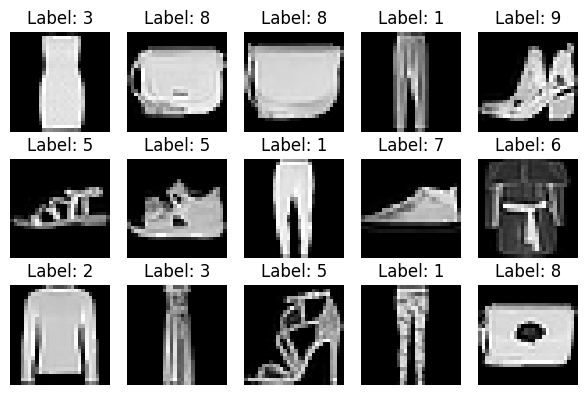

In [99]:
from torch.utils.data import DataLoader

subplots_grid = (3, 5)
n_elements_in_batch = subplots_grid[0] * subplots_grid[1]

train_dataloader = DataLoader(training_data, batch_size=n_elements_in_batch, shuffle=True)
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Label batch shape: {train_labels.size()}")

fig, axes = plt.subplots(*subplots_grid, figsize=(6, 4))
for batch_idx in range(n_elements_in_batch):
    i, j = np.unravel_index(batch_idx, subplots_grid)
    axes[i, j].imshow(train_features[batch_idx].squeeze(), cmap="gray")
    axes[i, j].set_title(f"Label: {train_labels[batch_idx]}")
    axes[i, j].axis("off")
fig.tight_layout()
plt.show()

## Transforms
This allows to perform some manipulation of the data to make it suitable for training. `Dataset` has two parameters:
- `transform` to modify features, or input data.
- `target_transform` to modify labels.

The [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) offers a variety of helpers out of box.

For example, to convert the labels of FashionMNIST dataset to one-hot encoded tensors, one could do the following:

In [122]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torch.nn.functional import one_hot

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: one_hot(torch.tensor(y), num_classes=10).float())
)

## Build the neural network
First step is to define the neural network architechture. This is done by subclassing `nn.Module` followed by definition and initialization of the neural network layers in `__init__`. Every `nn.Module` subclass implements the opertations on input in `forward` method.


In [ ]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # converts 2D image to 1D vector
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Internally the model consists of:
- The flattening layer, that converts a grayscale image to a flattened vector, which length is 28*28=784.
- Fully-connected layers:
  - the first layer accepts 784 features and outputs 512. Internally, it stores a bias vector `b` of shape `[512]`, and the weight matrix `W` of shape `[512, 784]`. The output of the layer is computed as: `y = W @ x + b`, or `y = x @ W.T + b`.
  - the output of the first layer is passed through a non-linear activation function (`ReLU`). Non-linear activations allow the NN to capture complex dependencies between inputs and outputs.
  - the second layer is a hidden layer that accepts 512 input features and maps them to 512 output features: it stores a bias vector of shape `[512]` and the weight matrix `W` of shape `[512, 512]`.
  - the output of the second layer is passed through a non-linear activation function once again.
  - The final layer maps 512 input features to 10 raw, unnormalized scores. Its `W` matrix size is `[10, 512]` and bias vector size is 10.

To check manually computed weights and biases sizes we can iterate over parameters and print their sizes:

In [160]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0280,  0.0346, -0.0355,  ..., -0.0093, -0.0026, -0.0119],
        [ 0.0295, -0.0124,  0.0290,  ..., -0.0299, -0.0191,  0.0117]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0207, -0.0264], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0036,  0.0323,  0.0086,  ..., -0.0347,  0.0087, -0.0358],
        [ 0.0286,  0.0102, -0.0166,  ..., -0.0317,  0.0012, -0.0410]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([0.0326, 0.0352], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values : tensor([[ 0.0021,  0.0229,  0.0386,  ..., -0.0394, -0.0255, -0.0167],
        [-0.0317, -0.0341,  0.0259,  ..., -0.0404, -0.0088, -0.0294]],
       grad_fn=<SliceBackward0>) 


Now, if we want to use the model, we feed in our data and get output. The model returns 2-dimensional tensor `[batch_size, num_classes]`:

In [156]:
X = torch.rand(1, 28, 28)
logits = model(X)
print(logits)

tensor([[-0.0140, -0.0279, -0.0924, -0.0236,  0.0078,  0.0007, -0.1178, -0.0252,
          0.0177,  0.0578]], grad_fn=<AddmmBackward0>)


Now, if we want convert our raw scores from the last linear layer into probabilities we can use softmax function:
$$
p = \frac{e^{z_i}}{\sum_j{e^{z_j}}}.
$$

In [161]:
logits_np = logits.detach().numpy()
exp = np.exp(logits_np - logits_np.max())
probs = exp / exp.sum(axis=1, keepdims=True)
print(probs)

# or simply use nn.Softmax, dimension parameter indicates which dimension softmax would be computed along
pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)

y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

[[0.10065281 0.09926219 0.09306717 0.09969839 0.10286921 0.10214478
  0.09072939 0.09953106 0.10389863 0.10814633]]
tensor([[0.1007, 0.0993, 0.0931, 0.0997, 0.1029, 0.1021, 0.0907, 0.0995, 0.1039,
         0.1081]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([9])


## Automatic differentation with `torch.autograd`